<a href="https://colab.research.google.com/github/Benguergoura-Abderarahim/DS-DL-AI-Project-courses-/blob/main/CP3_Bank_Deposit_(Binary_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

In [ ]:
print("Choisir le fichier bank.csv")
uploaded=files.upload()

Choisir le fichier bank.csv


Saving bank.csv to bank.csv


# Data Exploration & visualization

In [ ]:
data = pd.read_csv('bank.csv')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data[['poutcome', 'contact']].value_counts()

poutcome  contact  
unknown   cellular     5435
          unknown      2327
failure   cellular     1143
success   cellular      980
unknown   telephone     564
other     cellular      484
success   telephone      85
failure   telephone      79
other     telephone      46
          unknown         7
success   unknown         6
failure   unknown         6
dtype: int64

In [ ]:
features = data.drop(['deposit'], axis=1)

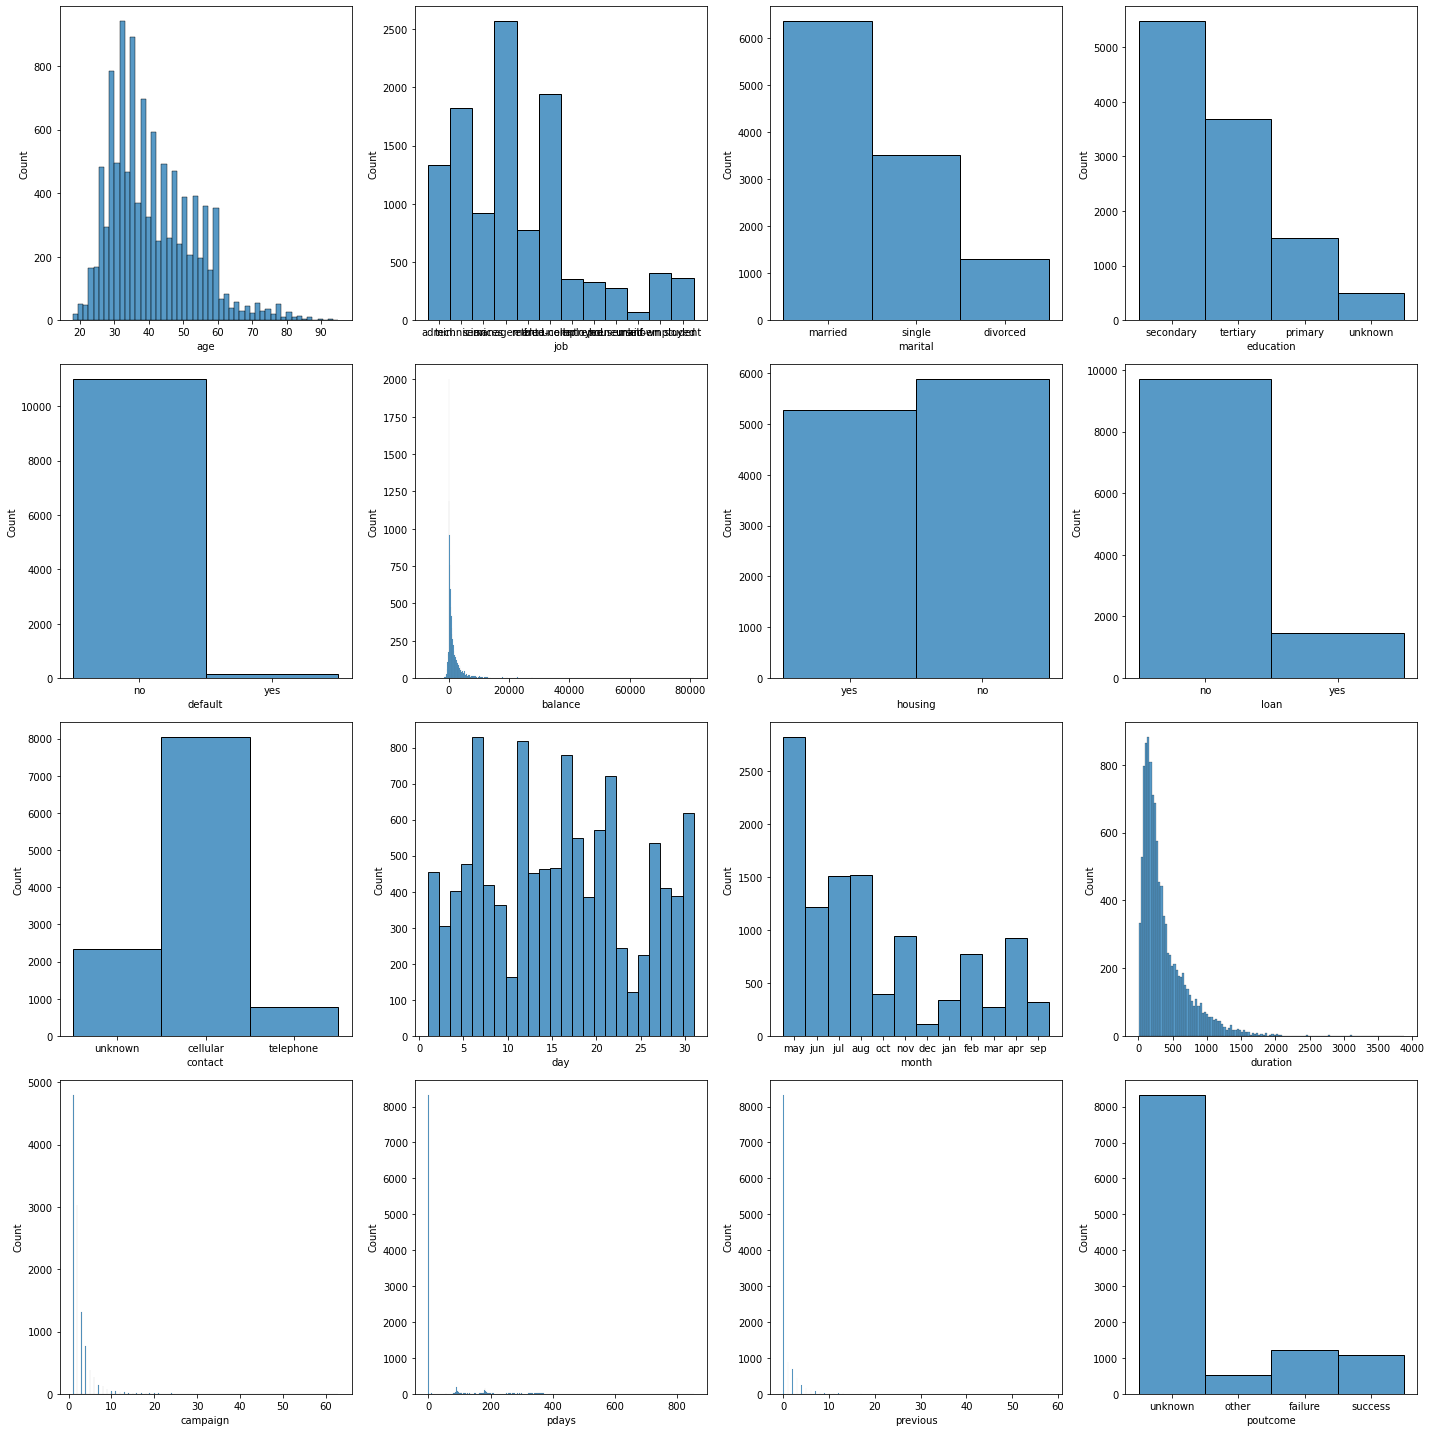

In [ ]:
# Data histplots
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in features.items():
    sns.histplot(x=k, data=features, ax=axs[index])
    index += 1
fig.tight_layout()

In [ ]:
data[['job', 'deposit']].value_counts() # I added this since it didn't appear well in the following visualization

job            deposit
management     yes        1301
               no         1265
blue-collar    no         1236
technician     no          983
               yes         840
blue-collar    yes         708
admin.         no          703
               yes         631
services       no          554
retired        yes         516
services       yes         369
student        yes         269
retired        no          262
self-employed  no          218
entrepreneur   no          205
unemployed     yes         202
self-employed  yes         187
housemaid      no          165
unemployed     no          155
entrepreneur   yes         123
housemaid      yes         109
student        no           91
unknown        no           36
               yes          34
dtype: int64

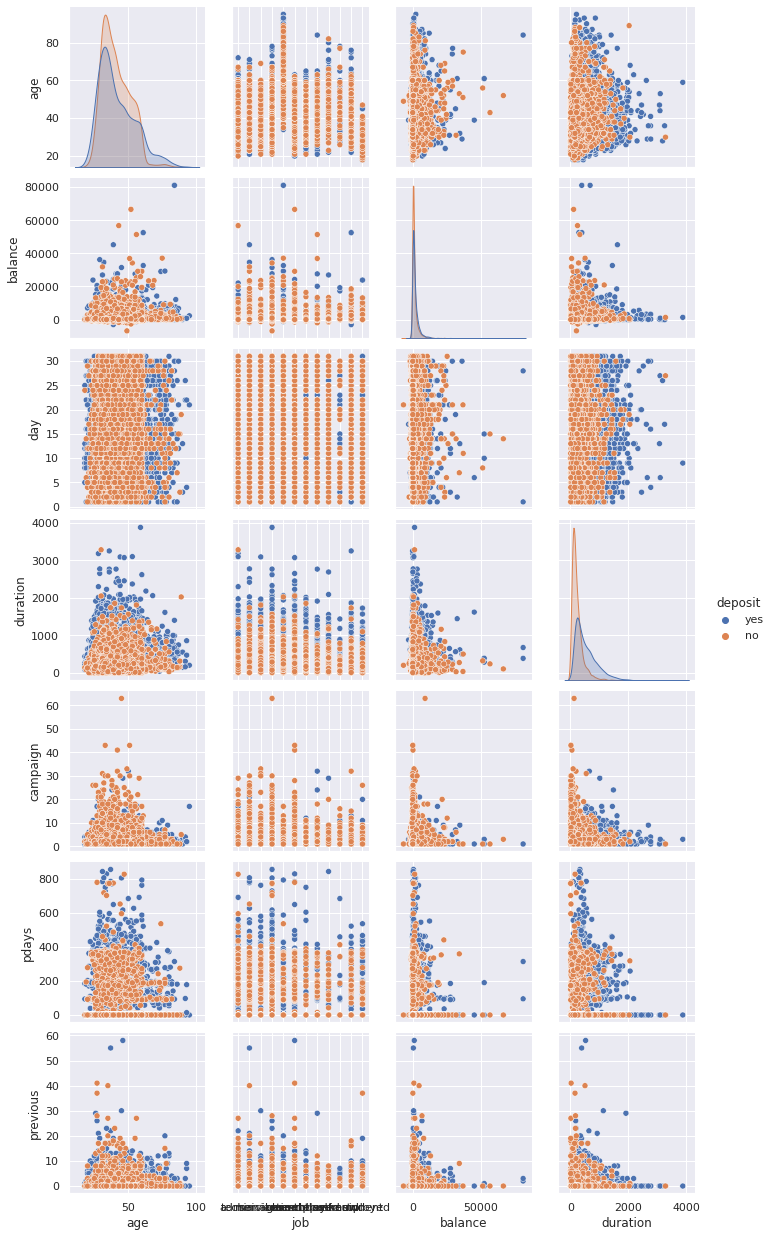

In [ ]:
#Pairplots
sns.set()
grid = sns.pairplot(data=data, hue='deposit', x_vars=['age','job', 'balance', 'duration'])
for ax in grid.axes.flat[:2]:
    ax.tick_params(axis='x', labelrotation=90) # I wanted the label for job especially to be vertical for a better display but didn't work with that code

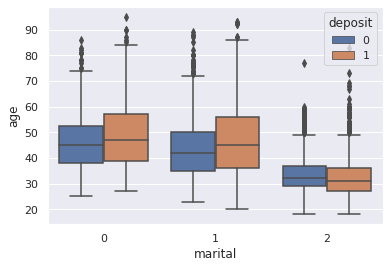

In [ ]:
# Data histplots
sns.boxplot(y=data['age'], x=data['marital'], hue=data['deposit'])

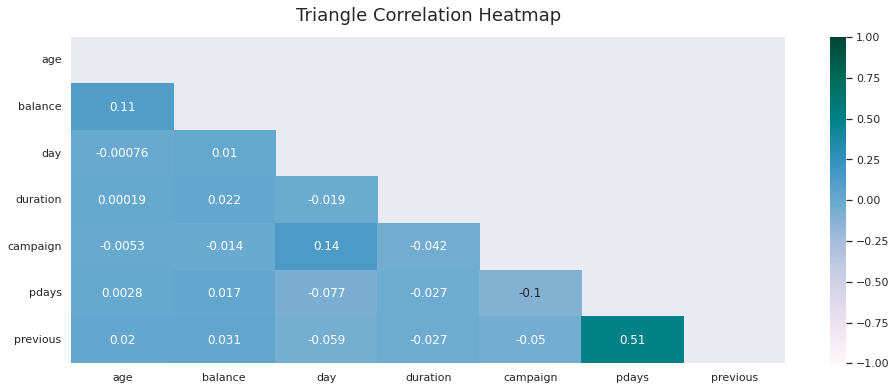

In [ ]:
# For the original data

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PuBuGn')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Data Preprocessing:

In [ ]:
data = data.drop('month', axis=1) #I droped it since it had a problem in labelencoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['deposit']  = label.fit_transform(data['deposit'])

data['job']      = label.fit_transform(data['job']) 
data['marital']  = label.fit_transform(data['marital']) 
data['education']= label.fit_transform(data['education']) 
data['default']  = label.fit_transform(data['default']) 
data['housing']  = label.fit_transform(data['housing']) 
data['loan']     = label.fit_transform(data['loan'])
data['poutcome'] = label.fit_transform(data['poutcome'])
data['contact']  = label.fit_transform(data['contact'])


In [ ]:
features = data.drop('deposit', axis=1)

In [ ]:
features.shape

(11162, 15)

## Train/Test Split step

In [ ]:
from sklearn.model_selection import train_test_split

x = features
y = data['deposit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [ ]:
from sklearn.preprocessing import StandardScaler #To resolve some scaling problems
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [ ]:
x_train.shape

(8929, 15)

# Building model

In [ ]:
model = Sequential()

model.add(Dense(32, input_shape=(15,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax')) #If we used sigmoid (for BCE) we should then replace 2 by 1 & activation by "sigmoid"

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy']) 
#for binarycrossentropy we should adjust the loss to either "BCE" or "binarycrossentropy" with parameters for model explained above

In [ ]:
history= model.fit(x_train, y_train, epochs = 40, validation_split=0.2, batch_size=32)

Epoch 1/40
224/224 [==============================] - 2s 3ms/step - loss: 0.5076 - accuracy: 0.7530 - val_loss: 0.4442 - val_accuracy: 0.8001
Epoch 2/40
224/224 [==============================] - 1s 2ms/step - loss: 0.4434 - accuracy: 0.7980 - val_loss: 0.4391 - val_accuracy: 0.8012
Epoch 3/40
224/224 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8058 - val_loss: 0.4369 - val_accuracy: 0.8024
Epoch 4/40
224/224 [==============================] - 1s 3ms/step - loss: 0.4259 - accuracy: 0.8111 - val_loss: 0.4343 - val_accuracy: 0.8035
Epoch 5/40
224/224 [==============================] - 1s 2ms/step - loss: 0.4174 - accuracy: 0.8137 - val_loss: 0.4407 - val_accuracy: 0.8024
Epoch 6/40
224/224 [==============================] - 1s 2ms/step - loss: 0.4155 - accuracy: 0.8167 - val_loss: 0.4269 - val_accuracy: 0.8124
Epoch 7/40
224/224 [==============================] - 1s 2ms/step - loss: 0.4076 - accuracy: 0.8172 - val_loss: 0.4275 - val_accuracy: 0.8057
Epoch 

## Evaluate model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8114643692970276


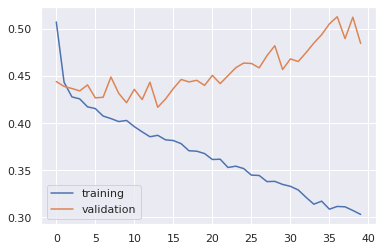

In [ ]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

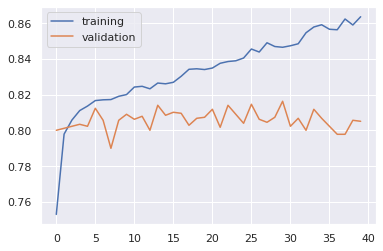

In [ ]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

In [ ]:
test_logits = model.predict(x_test)

In [ ]:
y_pred = np.argmax(test_logits, axis=1) #As we did in previous workshops

In [ ]:
y_pred = np.array(y_pred, dtype='int64') #Transform results of both y_pred & y_test to an array with same dtype otherwise it won't work.
y_test = np.array(y_test, dtype='int64')

In [ ]:
print(y_pred,'\n')
print(y_test)

[1 1 0 ... 1 0 0] 

[1 1 1 ... 1 0 0]


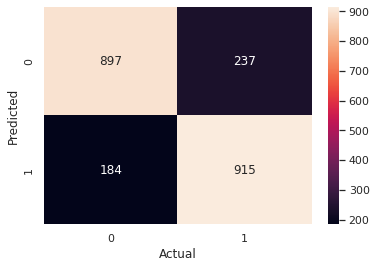

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True,fmt='g')

In [ ]:
data['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [ ]:
class_report = classification_report(y_pred, y_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1081
           1       0.83      0.79      0.81      1152

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



# Bonus: 
There's a much more simplier another way to get a neural network model for our dataset

In [ ]:
from sklearn.neural_network import MLPClassifier
model_2 = MLPClassifier(hidden_layer_sizes=(5,2,2), max_iter=200, activation='relu', solver='adam', random_state=10, batch_size=32)
model_2.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# print the training error and MSE
print("Training error: %f" % model_2.loss_curve_[-1])
print("Training set score: %f" % model_2.score(x_train, y_train))
print("Test set score: %f" % model_2.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))

print("MSE: %f" % mean_squared_error(y_test, y_pred)) #Would have been used if we had applied a PCA fit to x_train/test & right now it's not a regression
                                                      #problem but a binary classification one instead. So to use that metrics, we could for example transform
                                                      #our y_test & y_preds to probabilities instead of an array of binary values. Thus transforming classification
                                                      #into a regression problem. 

Training error: 0.411409
Training set score: 0.820473
Test set score: 0.824899
0.8114643976712942
MSE: 0.188536


#Conclusion:

Since I droped so many features (half of them) which gave me accuracy of 63%, this is only natural that we got a very low accuracy. Some teachings from here : Preprocessing phase is the most important thing to do well if we want to get the best results when building our model.

I didn't removed some outliers (would have been done using the quantile method).

**Update:** 
* I reworked the dataset & let all features except "month" which I droped : 
results ==> +20% accuracy for all scores.

* A further preprocessing(like using OrdinalEncoder fit for "education" -grade or degree of education of clients-, removing outliers for important features (such "age", "marital"...etcn & other advanced encoding/preprocessing techniques) would surely improve the accuracy's results by a few rate.